# Tsunami Simulator Plotter

Adapted from: "[Modern Fortran: Building Efficient Parallel Applications](https://www.manning.com/books/modern-fortran)" by Milan Curcic (Manning)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

#matplotlib.use('Agg')
#matplotlib.rcParams.update({'font.size': 16})

In [2]:
code_dir = "Fortran_Code/Tsunami_Simulator/"
output_filename = 'tsunami_simulator_data.txt'
datafile_full_path = code_dir + output_filename

In [3]:
# read data into a list
data = [line.rstrip().split() for line in open(datafile_full_path).readlines()]

In [4]:
time = [float(line[0]) for line in data]
h = np.array([[float(x) for x in line[1:]] for line in data])
x = np.arange(1, h.shape[1]+1)
time_steps = [0, 25, 50, 75]

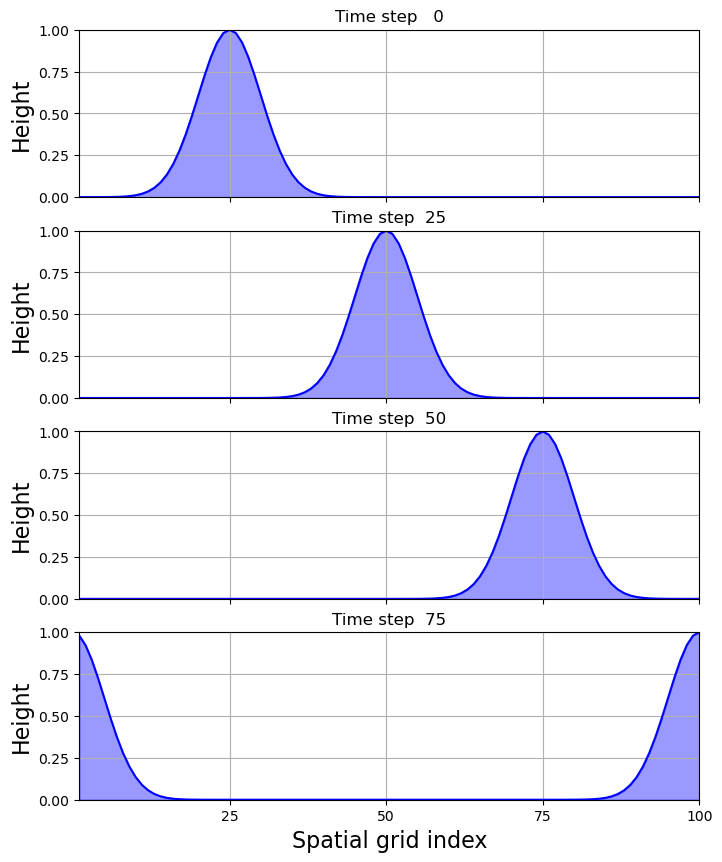

In [5]:
fig = plt.figure(figsize=(8, 10))
axes = [plt.subplot2grid((4, 1), (row, 0), colspan=1, rowspan=1)
        for row in range(4)]

for ax in axes:
    n = axes.index(ax)
    ax.plot(x, h[time_steps[n], :], 'b-')
    ax.fill_between(x, 0, h[time_steps[n], :], color='b', alpha=0.4)
    ax.grid()
    ax.set_xlim(1, 100)
    ax.set_ylim(0, 1)
    ax.set_ylabel('Height', fontsize=16)
    ax.set_xticks([25, 50, 75, 100])
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
    
for ax in axes:
    n = axes.index(ax)
    ax.set_title('Time step ' + '%3i' % time_steps[n])

for ax in axes[:-1]:
    ax.set_xticklabels([])

axes[3].set_xlabel('', fontsize=16)
axes[-1].set_xlabel('Spatial grid index')
plt.show()
#plt.savefig('water_height_ch02.svg')
#plt.close(fig)